In [1]:
import os
import sys
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [3]:
optimizers = {
    'SGD': SGD(),
    'Momentum': Momentum(),
    'AdaGrad': AdaGrad(),
    'Adam': Adam(),
}

In [5]:
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10,
    )
    train_loss[key] = []

In [6]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
        
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
        
    if i % 100 == 0:
        print('========== iteration: %d ==========' % i)
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ':' + str(loss))

========== iteration: 0 ==========
SGD:2.45750357804
Momentum:2.35491504735
AdaGrad:2.26651687241
Adam:2.17978099358
========== iteration: 100 ==========
SGD:1.56272427972
Momentum:0.324212533228
AdaGrad:0.127242127921
Adam:0.235196212443
========== iteration: 200 ==========
SGD:0.74880811858
Momentum:0.260406887769
AdaGrad:0.0725098199253
Adam:0.1825728033
========== iteration: 300 ==========
SGD:0.440643680084
Momentum:0.129337967196
AdaGrad:0.0424997169974
Adam:0.0634747625413
========== iteration: 400 ==========
SGD:0.301023321923
Momentum:0.151411285342
AdaGrad:0.0621403331009
Adam:0.157499735017
========== iteration: 500 ==========
SGD:0.392250952862
Momentum:0.110670731989
AdaGrad:0.0502609081862
Adam:0.108431202393
========== iteration: 600 ==========
SGD:0.408768733384
Momentum:0.195190626304
AdaGrad:0.0798091912358
Adam:0.117076017906
========== iteration: 700 ==========
SGD:0.257116686649
Momentum:0.0967097859593
AdaGrad:0.0298865096706
Adam:0.057372785163
========== iterati

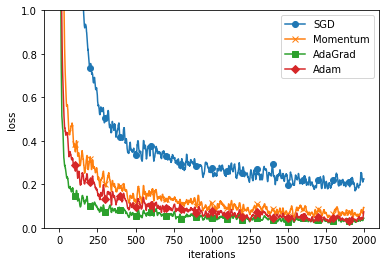

In [7]:
markers = {
    'SGD': 'o',
    'Momentum': 'x',
    'AdaGrad': 's',
    'Adam': 'D',
}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0, 1)
plt.legend()
plt.show()